# Assignment_1

In [1]:
# Name- Hrithik Singh, MMgt 2nd year, 20857

In [2]:
# importing necessary libraries for data manipulation and plotting
library(dplyr)
library(ggplot2)
library(zoo)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



Reading different indicator's data (from start date to present) which was downloaded from provided website links :

In [3]:
# reading the monthly data of National Activity Index (used to assess the overall health and direction of the US economy)
NAI<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/CFNAI.csv')
NAI$DATE <- as.Date(NAI$DATE)    #changing the values of date column in the date format.

# reading the monthly data of Consumer Price Index (measures the avg change over time in the prices paid by urban
# consumers for a market basket of consumer goods and services)
CPI<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/CPIAUCSL.csv')
CPI$DATE <- as.Date(CPI$DATE)

# reading the monthly data of US Dollar Index (measures the value of USD relative to the basket of other world currencies
# each weighted by their significance in inter national trade)
us_dollar_index<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/TWEXBGSMTH.csv')
us_dollar_index$DATE <- as.Date(us_dollar_index$DATE)

# reading the monthly data of change in US 2-year treasury yields (fluctuations in the interest rates on US govt bonds with
# maturity of 2 years)
t_bills_2Y_yield<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/GS2.csv')
t_bills_2Y_yield$DATE <- as.Date(t_bills_2Y_yield$DATE)

# reading the daily data of credit spreads (additionalyield offered by riskier bonds as compared to yield of US treasury
# bonds)
credit_spread<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/BAMLH0A0HYM2.csv')
credit_spread$DATE <- as.Date(credit_spread$DATE)

In [4]:
# printing each dataframe to see initial rows
cat("Initial rows of NAI data:", "\n")
head(NAI)

cat("Initial rows of CPI data:", "\n")
head(CPI)

cat("Initial rows of us_dollar_index data:", "\n")
head(us_dollar_index)

cat("Initial rows of t_bills_2Y_yield data:", "\n")
head(t_bills_2Y_yield)

cat("Initial rows of credit_spread data:", "\n")
head(credit_spread)    # we can notice missing data points in the credit_spread data

Initial rows of NAI data: 


DATE,CFNAI
1967-03-01,-0.34
1967-04-01,0.01
1967-05-01,-0.55
1967-06-01,0.04
1967-07-01,-0.32
1967-08-01,0.99


Initial rows of CPI data: 


DATE,CPIAUCSL
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08


Initial rows of us_dollar_index data: 


DATE,TWEXBGSMTH
2006-01-01,100.0000
2006-02-01,100.2112
2006-03-01,100.4281
2006-04-01,99.7435
2006-05-01,97.5118
2006-06-01,98.6927


Initial rows of t_bills_2Y_yield data: 


DATE,GS2
1976-06-01,7.06
1976-07-01,6.85
1976-08-01,6.63
1976-09-01,6.42
1976-10-01,5.98
1976-11-01,5.81


Initial rows of credit_spread data: 


DATE,BAMLH0A0HYM2
1996-12-31,3.13
1997-01-01,.
1997-01-02,3.06
1997-01-03,3.09
1997-01-06,3.10
1997-01-07,3.10


Reading monthly S&P 500 data (1997-01-01 to 2006-12-01) for visualization and making market timing strategies

In [5]:
#Reading monthly S&P 500 data 
sp_500_trial<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/s&p_500_trial.csv')
sp_500_trial$Date <- as.Date(sp_500_trial$Date)

#printing initial rows
cat("Initial rows of sp_500_trial data:", "\n")
head(sp_500_trial)

Initial rows of sp_500_trial data: 


Date,Open,High,Low,Close,Adj.Close,Volume
1997-01-01,740.74,794.67,729.55,786.16,786.16,11635830000
1997-02-01,786.16,817.68,773.43,790.82,790.82,9715930000
1997-03-01,790.82,814.90,756.13,757.12,757.12,10120760000
1997-04-01,757.12,804.13,733.54,801.34,801.34,10454880000
1997-05-01,801.34,851.87,793.21,848.28,848.28,10106650000
1997-06-01,848.28,902.09,838.82,885.14,885.14,10857950000


In [6]:
#calculating inflation from the monthly CPI data for using it as an indicator

In [7]:
# Calculating the 12-month percentage change , i.e yearly inflation and making it a new column
CPI <- CPI %>%
  mutate(yearly_inflation = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

# Calculating the change in yearly inflation every month and making it a new column
CPI <- CPI %>%
  mutate(y_diff = yearly_inflation - lag(yearly_inflation, 1))

In [8]:
# data cleaning and pre-processing of US credit spreads

In [9]:
# checking the data type of entries in "BAMLH0A0HYM2" column
data_types <- sapply(credit_spread$BAMLH0A0HYM2, class)

cat("Following are the datatypes of BAMLH0A0HYM2 column :", "\n")
print(data_types)    # we can see that datatype is not numeric

Following are the datatypes of BAMLH0A0HYM2 column : 
   [1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
   [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [17] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [25] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [33] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [41] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [49] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [57] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [65] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [73] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [81] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [89] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor

In [10]:
# Changing the datatype to "numeric", as we saw above that there are some missing data points, now from the below code they
# will be automatically changed to NA
credit_spread$BAMLH0A0HYM2 <- as.numeric(as.character(credit_spread$BAMLH0A0HYM2))

cat(" Initial rows of credit_spread with one entry as NA:", "\n")
head(credit_spread)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

 Initial rows of credit_spread with one entry as NA: 


DATE,BAMLH0A0HYM2
1996-12-31,3.13
1997-01-01,NA
1997-01-02,3.06
1997-01-03,3.09
1997-01-06,3.10
1997-01-07,3.10


In [11]:
# Now we will replace the NA values with the immediate previous values
# could have also taken the avg of immediate previous and forward values but can be two consecutive NAs.
# We have seen that 1st entry is of type numeric and since we will go one by one to check for NAs, hence here every NA will
# be preceeded by a numeric value only , even in the case of consecutive NAs.
credit_spread$BAMLH0A0HYM2[is.na(credit_spread$BAMLH0A0HYM2)] <- 
  lag(credit_spread$BAMLH0A0HYM2)[is.na(credit_spread$BAMLH0A0HYM2)]

cat(" checking whether the NA in 2nd row is same as its previous value :", "\n")
head(credit_spread)

 checking whether the NA in 2nd row is same as its previous value : 


DATE,BAMLH0A0HYM2
1996-12-31,3.13
1997-01-01,3.13
1997-01-02,3.06
1997-01-03,3.09
1997-01-06,3.10
1997-01-07,3.10


In [12]:
# Since the credit_spread is a daily data , we will convert it into equivalent monthly data by taking avg of all days in a
# given month and assign this single number to that month
credit_spread_monthly <- credit_spread %>%
  mutate(DATE = format(DATE, "%Y-%m")) %>%
  group_by(DATE) %>%
  summarise(monthly = mean(BAMLH0A0HYM2))

# Printing initial rows of resulting data frame
cat(" Initial rows of credit_spread_monthly :", "\n")
head(credit_spread_monthly)

#adding the date value as 1 to convert the entries of DATE column into yyyy-mm-dd format
credit_spread_monthly <- credit_spread_monthly %>%
  mutate(DATE = paste(DATE, "01", sep = "-"))

# Printing initial rows of resulting data frame
cat(" Initial rows of rectified credit_spread_monthly :", "\n")
head(credit_spread_monthly)

credit_spread_monthly$DATE <- as.Date(credit_spread_monthly$DATE)    #finally changing DATE column to date format

 Initial rows of credit_spread_monthly : 


DATE,monthly
1996-12,3.130000
1997-01,3.036957
1997-02,2.956000
1997-03,2.696190
1997-04,2.893182
1997-05,2.721739


 Initial rows of rectified credit_spread_monthly : 


DATE,monthly
1996-12-01,3.130000
1997-01-01,3.036957
1997-02-01,2.956000
1997-03-01,2.696190
1997-04-01,2.893182
1997-05-01,2.721739


In [13]:
# checking if there is any NA value in the above new dataframe
cat(paste("NA values in the monthly column:", anyNA(credit_spread_monthly[['monthly']])))

NA values in the monthly column: TRUE

In [14]:
# again replacing NA with is immediate previous value
credit_spread_monthly$monthly[is.na(credit_spread_monthly$monthly)] <- 
  lag(credit_spread_monthly$monthly)[is.na(credit_spread_monthly$monthly)]

# checking if there is any NA value now
cat(paste("NA values in the monthly column:", anyNA(credit_spread_monthly[['monthly']])))

NA values in the monthly column: FALSE

In [15]:
# We will make a new dataframe of all the indicators between date (1997-01-01 to 2006-12-01) (same as that of sp_500_trial)
# for analysing the trends in these indicators and the trend s&p index

In [16]:
start_date <- as.Date("1997-01-01")    #initializing start and end date so that we could get the index of each dataframe
end_date <- as.Date("2006-12-01")      #corresponding to these dates which will be used for slicing the dataframes

# NAI
s_NAI <- which(NAI$DATE == start_date)
e_NAI <- which(NAI$DATE == end_date)
print(paste(" NAI data index of 1997-01-01 :" ,s_NAI))
print(paste(" NAI data index of 2006-12-01 :" ,e_NAI))
cat(" ", "\n")

# CPI
s_CPI <- which(CPI$DATE == start_date)
e_CPI <- which(CPI$DATE == end_date)
print(paste(" CPI data index of 1997-01-01 :" ,s_CPI))
print(paste(" CPI data index of 2006-12-01 :" ,e_CPI))
cat(" ", "\n")

# us_dollar_index
s_us_dollar_index <- which(us_dollar_index$DATE == start_date)
e_us_dollar_index <- which(us_dollar_index$DATE == end_date)
print(paste(" us_dollar_index data index of 1997-01-01 :" ,s_us_dollar_index))
print(paste(" us_dollar_index data index of 2006-12-01 :" ,e_us_dollar_index))
cat(" ", "\n")

# t_bills_2Y_yield
s_t_bills_2Y_yield <- which(t_bills_2Y_yield$DATE == start_date)
e_t_bills_2Y_yield <- which(t_bills_2Y_yield$DATE == end_date)
print(paste(" t_bills_2Y_yield data index of 1997-01-01 :" ,s_t_bills_2Y_yield))
print(paste(" t_bills_2Y_yield data index of 2006-12-01 :" ,e_t_bills_2Y_yield))
cat(" ", "\n")

# credit_spread_monthly
s_credit_spread_monthly <- which(credit_spread_monthly$DATE == start_date)
e_credit_spread_monthly <- which(credit_spread_monthly$DATE == end_date)
print(paste(" credit_spread_monthly data index of 1997-01-01 :" ,s_credit_spread_monthly))
print(paste(" credit_spread_monthly data index of 2006-12-01 :" ,e_credit_spread_monthly))
cat(" ", "\n")

# sp_500
s_sp_500_trial <- which(sp_500_trial$Date == start_date)
e_sp_500_trial <- which(sp_500_trial$Date == end_date)
print(paste(" credit_spread_monthly data index of 1997-01-01 :" ,s_sp_500_trial))
print(paste(" credit_spread_monthly data index of 2006-12-01 :" ,e_sp_500_trial))

[1] " NAI data index of 1997-01-01 : 359"
[1] " NAI data index of 2006-12-01 : 478"
  
[1] " CPI data index of 1997-01-01 : 601"
[1] " CPI data index of 2006-12-01 : 720"
  
[1] " us_dollar_index data index of 1997-01-01 : "
[1] " us_dollar_index data index of 2006-12-01 : 12"
  
[1] " t_bills_2Y_yield data index of 1997-01-01 : 248"
[1] " t_bills_2Y_yield data index of 2006-12-01 : 367"
  
[1] " credit_spread_monthly data index of 1997-01-01 : 2"
[1] " credit_spread_monthly data index of 2006-12-01 : 121"
  
[1] " credit_spread_monthly data index of 1997-01-01 : 1"
[1] " credit_spread_monthly data index of 2006-12-01 : 120"


In [17]:
combined_list <- list() # initializing a list for storing the sliced dataframes 

#slicing NAI
selected_df <- NAI %>%
    slice(s_NAI:e_NAI) %>%    #slicing the dataframe
    select(date= DATE, economic_trend = CFNAI)
combined_list[[1]] <- selected_df    #storing the sliced dataframe in combined_list

#slicing CPI
selected_df <- CPI %>%
    slice(s_CPI:e_CPI) %>%
    select(inflation_yearly = yearly_inflation)    #only choosing that column which will be used as an indicator
combined_list[[2]] <- selected_df

#slicing t_bills_2Y_yield
selected_df <- t_bills_2Y_yield %>%
    slice(s_t_bills_2Y_yield:e_t_bills_2Y_yield) %>%
    select(t_bills_2Y_yield = GS2)
combined_list[[3]] <- selected_df

#slicing credit_spread_monthly
selected_df <- credit_spread_monthly %>%
    slice(s_credit_spread_monthly:e_credit_spread_monthly) %>%
    select(credit_spread_monthly = monthly)
combined_list[[4]] <- selected_df

#slicing price
selected_df <- sp_500_trial %>%
    slice(s_sp_500_trial:e_sp_500_trial) %>%
    select(sp_index = Open)
combined_list[[5]] <- selected_df

In [18]:
# Combining sliced data frames with selected columns to make a new dataframe for further analysis.
trial_indicators <- bind_cols(combined_list)

In [19]:
cat(" Printing initial rows of this new dataframe of indicators and sp_index) :", "\n")
head(trial_indicators)

 Printing initial rows of this new dataframe of indicators and sp_index) : 


date,economic_trend,inflation_yearly,t_bills_2Y_yield,credit_spread_monthly,sp_index
1997-01-01,0.27,3.038138,6.01,3.036957,740.74
1997-02-01,0.77,3.032258,5.90,2.956000,786.16
1997-03-01,0.28,2.765273,6.22,2.696190,790.82
1997-04-01,0.06,2.434337,6.45,2.893182,757.12
1997-05-01,0.18,2.237852,6.28,2.721739,801.34
1997-06-01,0.37,2.233567,6.09,2.617143,848.28


In [20]:
# we can see that the values of different columns are in different scales, hence we will normalize the values of each column
# except the economic_trend (because it already between zero and 1) for further analysing their trends

In [21]:
# for normalizing, we will subtract column mean from each entry and devide by column standard deviation
#inflation_yearly
trial_indicators <- trial_indicators %>%
  mutate(inflation_yearly = (inflation_yearly - mean(inflation_yearly)) / sd(inflation_yearly))

In [22]:
#t_bills_2Y_yield
trial_indicators <- trial_indicators %>%
  mutate(t_bills_2Y_yield = (t_bills_2Y_yield - mean(t_bills_2Y_yield)) / sd(t_bills_2Y_yield))

In [23]:
#credit_spread_monthly
trial_indicators <- trial_indicators %>%
  mutate(credit_spread_monthly = (credit_spread_monthly - mean(credit_spread_monthly)) / sd(credit_spread_monthly))

In [24]:
#sp_index
trial_indicators <- trial_indicators %>%
  mutate(sp_index = (sp_index - mean(sp_index)) / sd(sp_index))

In [25]:
# printing the normalized trial_indicators dataframe
cat(" normalized trial_indicators dataframe :", "\n")
head(trial_indicators)

 normalized trial_indicators dataframe : 


date,economic_trend,inflation_yearly,t_bills_2Y_yield,credit_spread_monthly,sp_index
1997-01-01,0.27,0.5979409,1.152404,-1.003632,-2.211628
1997-02-01,0.77,0.5908471,1.082536,-1.040969,-1.963798
1997-03-01,0.28,0.2687628,1.285789,-1.160791,-1.938371
1997-04-01,0.06,-0.1304713,1.431877,-1.069940,-2.122252
1997-05-01,0.18,-0.3675067,1.323899,-1.149008,-1.880970
1997-06-01,0.37,-0.3726752,1.203217,-1.197247,-1.624846


In [26]:
# now with the normalized columns we can plot the trends and see how each indicator is interacting with sp_index

In [27]:
# capturing the trend by taking 12 months moving avg so that we could cover atleast one whole cycle for almost all
#seasonal activities
trial_indicators$economic_trend_ma_12 <- rollmean(trial_indicators$economic_trend, k = 12, align = "right", fill = NA)
trial_indicators$inflation_yearly_ma_12 <- rollmean(trial_indicators$inflation_yearly, k = 12, align = "right", fill = NA)
trial_indicators$t_bills_2Y_yield_ma_12 <- rollmean(trial_indicators$t_bills_2Y_yield, k = 12, align = "right", fill = NA)
trial_indicators$credit_spread_monthly_ma_12 <- rollmean(trial_indicators$credit_spread_monthly, k = 12, align = "right", fill = NA)
trial_indicators$sp_index_ma_12 <- rollmean(trial_indicators$sp_index, k = 12, align = "right", fill = NA)

In [28]:
# now we will plot each indicator with sp_index to study the trends

Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 11 rows containing missing values (geom_path)."

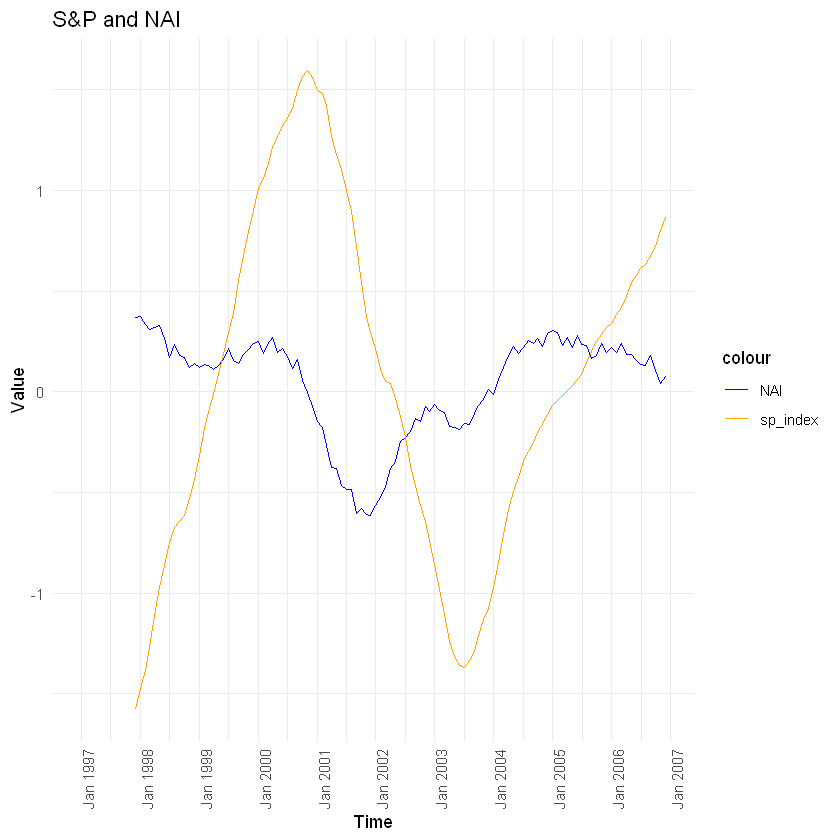

In [29]:
# Creating a line plot of sp_index and NAI
ggplot(trial_indicators, aes(x = date)) +
  geom_line(aes(y = economic_trend_ma_12, group = 1, color = "NAI")) +
#  geom_line(aes(y = inflation_yearly_ma_12, group = 1, color = "Yearly inflation")) +
#  geom_line(aes(y = t_bills_2Y_yield_ma_12, group = 1, color = "t_bills_2Y_yield")) +
#  geom_line(aes(y = credit_spread_monthly_ma_12, group = 1, color = "credit_spread_monthly")) +
  geom_line(aes(y = sp_index_ma_12, group = 1, color = "sp_index")) +
  labs(x = "Time", y = "Value", title = "S&P and NAI") +
  scale_color_manual(values = c("NAI" = "blue", "Yearly inflation" = "red", "t_bills_2Y_yield" = "green", "credit_spread_monthly" = "purple", "sp_index" = "orange")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y")  # Gap of 1 year while indexing x-axis

In [30]:
# In the above plot we can visually conclude that (which is subjective) increasing trend in economic_trend is immediately
# followed by increasing trend in sp_index.

# hence here we can have a strategy as follows:
#invest in next month if NAI of current month is +ve.

Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 11 rows containing missing values (geom_path)."

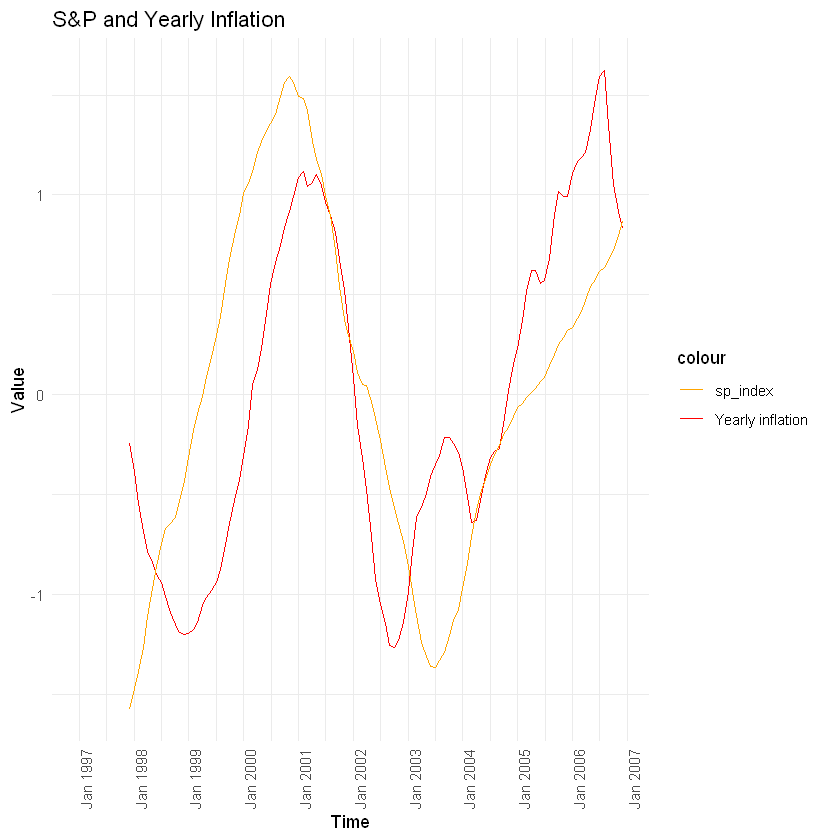

In [31]:
# Creating a line plot of sp_index and inflation_yearly
ggplot(trial_indicators, aes(x = date)) +
#  geom_line(aes(y = economic_trend_ma_12, group = 1, color = "NAI")) +
  geom_line(aes(y = inflation_yearly_ma_12, group = 1, color = "Yearly inflation")) +
#  geom_line(aes(y = t_bills_2Y_yield_ma_12, group = 1, color = "t_bills_2Y_yield")) +
#  geom_line(aes(y = credit_spread_monthly_ma_12, group = 1, color = "credit_spread_monthly")) +
  geom_line(aes(y = sp_index_ma_12, group = 1, color = "sp_index")) +
  labs(x = "Time", y = "Value", title = "S&P and Yearly Inflation") +
  scale_color_manual(values = c("NAI" = "blue", "Yearly inflation" = "red", "t_bills_2Y_yield" = "green", "credit_spread_monthly" = "purple", "sp_index" = "orange")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y")  # Gap of 1 year

In [32]:
# In the above plot we can visually conclude that (which is subjective) increasing trend in yearly inflation (1999 to 2001)
#is immediately followed by decreasing trend in sp_index (2001 to 2003) and so on.

# hence here we can have moving averages of 24 and 6 window length and can have a strategy as follows:
#invest in next month if 6 months moving avg(including current month) is less than 24 month moving avg of yearly inflation.
# we are using larger window lenght here because the increasing and decreasing trend is spanned along longer time horizon.

Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 11 rows containing missing values (geom_path)."

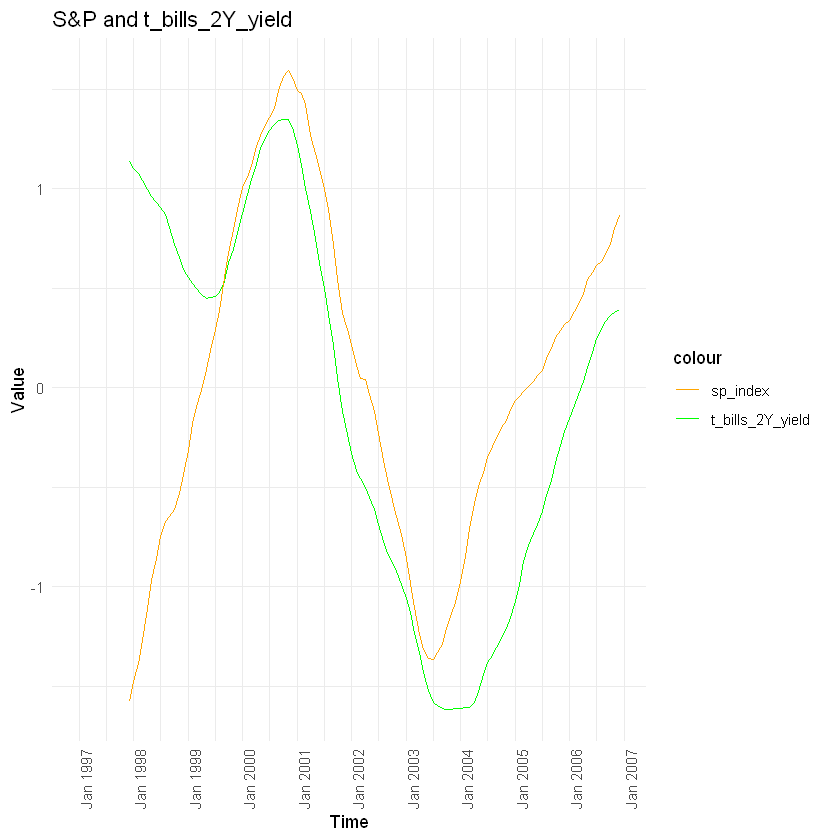

In [33]:
# Create a line plot of sp_index and t_bills_2Y_yield
ggplot(trial_indicators, aes(x = date)) +
#  geom_line(aes(y = economic_trend_ma_12, group = 1, color = "NAI")) +
#  geom_line(aes(y = inflation_yearly_ma_12, group = 1, color = "yearly inflation")) +
  geom_line(aes(y = t_bills_2Y_yield_ma_12, group = 1, color = "t_bills_2Y_yield")) +
#  geom_line(aes(y = credit_spread_monthly_ma_12, group = 1, color = "credit_spread_monthly")) +
  geom_line(aes(y = sp_index_ma_12, group = 1, color = "sp_index")) +
  labs(x = "Time", y = "Value", title = "S&P and t_bills_2Y_yield") +
  scale_color_manual(values = c("NAI" = "blue", "yearly inflation" = "red", "t_bills_2Y_yield" = "green", "credit_spread_monthly" = "purple", "sp_index" = "orange")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y")  # Gap of 1 year

In [34]:
# In the above plot we can visually conclude that (which is subjective) increasing trend in t_bills_2Y_yield (1999 to 2001)
#is immediately followed by decreasing trend in sp_index (2001 to 2003) and so on.

# hence here we can have moving averages of 24 and 6 window length and can have a strategy as follows:
#invest in next month if 6 months moving avg(including current month) is less than 24 month moving avg of t_bills_2Y_yield.
# we are using larger window lenght here because the increasing and decreasing trend is spanned along longer time horizon.

Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 11 rows containing missing values (geom_path)."

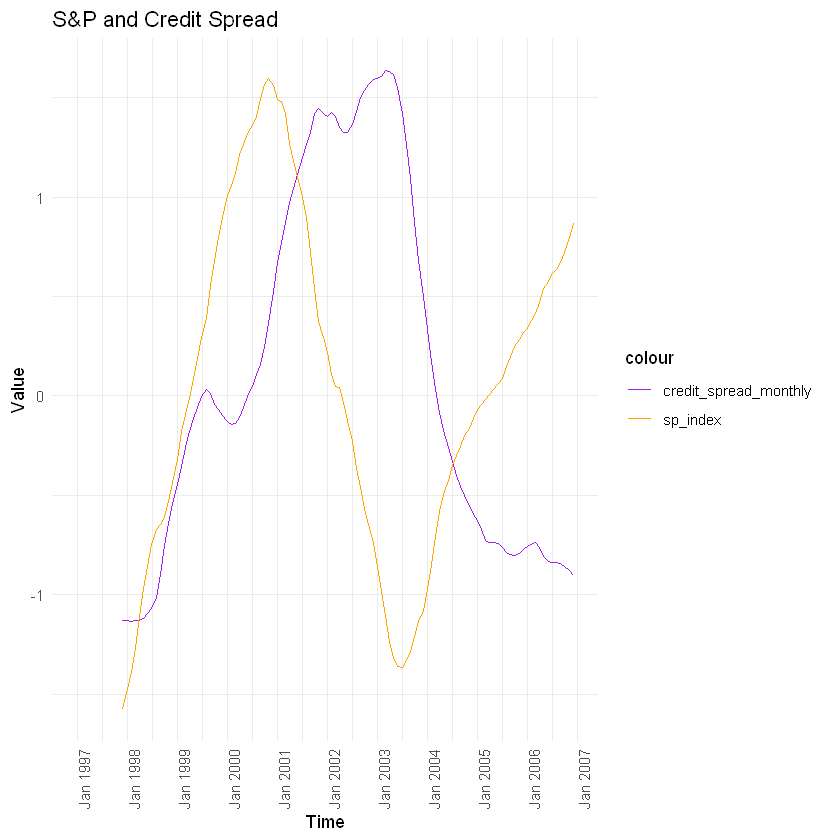

In [35]:
# Create a line plot of sp_index and credit_spread_monthly
ggplot(trial_indicators, aes(x = date)) +
#  geom_line(aes(y = economic_trend_ma_12, group = 1, color = "NAI")) +
#  geom_line(aes(y = inflation_yearly_ma_12, group = 1, color = "yearly inflation")) +
#  geom_line(aes(y = t_bills_2Y_yield_ma_12, group = 1, color = "t_bills_2Y_yield")) +
  geom_line(aes(y = credit_spread_monthly_ma_12, group = 1, color = "credit_spread_monthly")) +
  geom_line(aes(y = sp_index_ma_12, group = 1, color = "sp_index")) +
  labs(x = "Time", y = "Value", title = "S&P and Credit Spread") +
  scale_color_manual(values = c("NAI" = "blue", "yearly inflation" = "red", "t_bills_2Y_yield" = "green", "credit_spread_monthly" = "purple", "sp_index" = "orange")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y")  # Gap of 1 year

In [36]:
# In the above plot we can visually conclude that (which is subjective) increasing trend in credit_spread_monthly is roughly
# followed by decreasing trend in sp_index.

# hence here we can have moving averages of 12 and 3 window length and can have a strategy as follows:
#invest in next month if 3 months moving avg(including current month) is less than 12 month moving avg of
#credit_spread_monthly.

# here again we are using shorter time span because the increasing and decreasing trend is spanned along smaller time horizon.

In [37]:
# Due to insufficient data we didn't analyse the trend of US dollar index. Hence for that we will use 12m 3m moving avg 
# (12 is choosen for the same reason of capturing a whole cycle of seasonal activities with a single number) window with 
# following strategy:

#invest in next month if 3 months moving avg(including current month) is less than 12 month moving avg of
#us dollar index.

#Economic intuition : If US dollar will become weaker relative to weighted basket currencies , then it will attract foriegn
#                     investments and demand of indigenous goods and services will also increase internationally. Hence
#                     market will become more competitive which will result in a bull market.

FINAL STRATEGY:

In [38]:
# We have 5 indicators, in literature we saw that they use these indicators in different ways , moving avg , yearly change ,
# grouping them indifferent groups and then having different "or" and "and" conditions.

# But in order to do these things, we should have a mathematical reason or atleast some economic intuition.

# Due to lack of above two I would like to have a simple naive strategy of "MAJORITY":
#ASSUMPTION: Assuming that all the indicators are equally important

#we would decide to invest in the next month if atleast 3 of the 5 indicators are in the favor of it.
# and the favouring rule for each indicator is stated above.

In [39]:
# We would also like to try some other strategy inspired from the literature in next notebook3.